In [4]:
from sklearn  import neighbors
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [5]:
iris = datasets.load_iris()
x_data = iris.data[:, :2]
y_data = iris.target

x_train , x_test, y_train, y_test = train_test_split(x_data, y_data) # 分割数据集，20%为测试数据


In [6]:
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
def plot(model):
    x_min, x_max = x_data[:, 0].min() - 1 , x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1 , x_data[:, 1].max() + 1
    
    # 生成网格矩阵
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # np.r_按row行来组合array,一行叠在一行后面，变成一个很长的一行
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel和flatten类似，多维数据转一维，却会改变原始数据，最后变成[x,y],再进行预测
    z = z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, z)
    plt.scatter(x_data[:, 0], x_data[:, 1], c = y_data)
    plt.show()
  

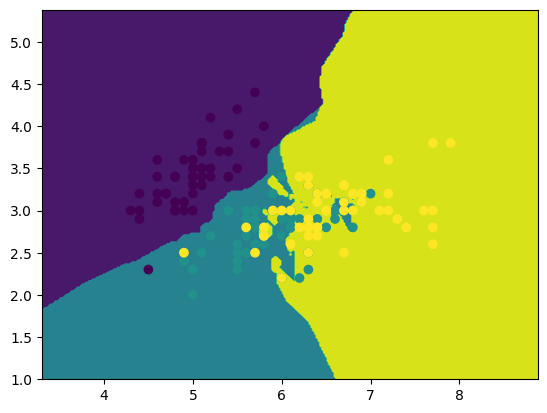

0.8157894736842105

In [12]:
plot(knn)

knn.score(x_test, y_test)

In [13]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)


DecisionTreeClassifier()

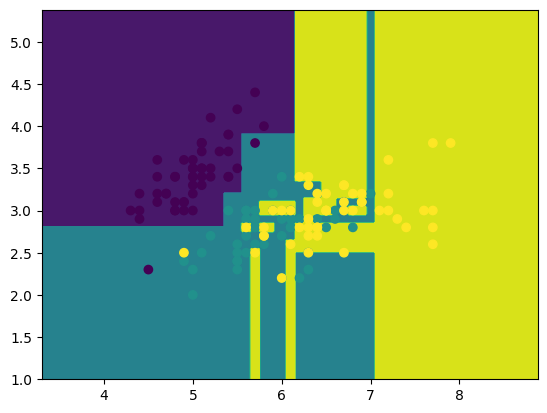

0.7105263157894737

In [14]:
plot(dtree)

dtree.score(x_test, y_test)

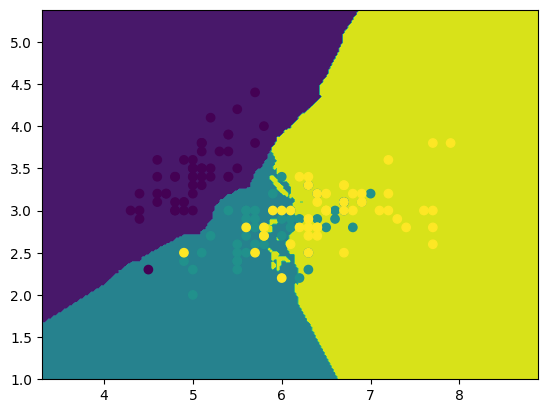

0.7894736842105263

In [18]:
bagging_knn=BaggingClassifier(knn, n_estimators=100)

bagging_knn.fit(x_train, y_train)
plot(bagging_knn)
bagging_knn.score(x_test, y_test)

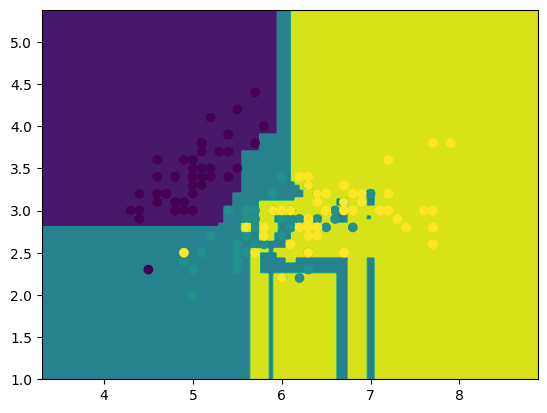

0.7368421052631579

In [19]:
bagging_dtree=BaggingClassifier(dtree, n_estimators=100)

bagging_dtree.fit(x_train, y_train)
plot(bagging_dtree)
bagging_dtree.score(x_test, y_test)